<a href="https://colab.research.google.com/github/KodekLim/DSL_Exercise/blob/main/Samuel_DSL_HandsoQuiz_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/pe8sutd/eda4u &> /dev/null
!git clone https://github.com/pe8sutd/eda4u &> /dev/null
%load_ext plugin

In [48]:
%%verilog

module decade_counter(
    input clk,
    input rst,
    output reg [4:0] count,
    output reg [4:0] ten
);

initial begin
    count <= 5'b00000;
    ten <= 1'b0;
end
// Counter to keep track of every third clock edge
reg [1:0] edge_counter;

// Process block for edge counting and main counting logic
always @(posedge clk)
begin
    if (rst != 1'b1)
    begin
        // Reset conditions
        count <= 5'b00001;  // Set count to 1 when reset is low
        ten <= 1'b1;        // Set ten to 1 when reset is low
        edge_counter <= 2'b00;  // Reset edge counter
    end
    else
    begin
        // Increment edge counter
        if (edge_counter == 2'b10)
            begin
                // Reset edge counter and increment main counter
                edge_counter <= 2'b00;
                if (count == 5'b10010)
                    begin
                        count <= 5'b00000;  // Reset count after reaching 5'b10010
                        ten <= 1'b0;        // Set ten to 0 only when count is 5'b10010
                    end
                else
                begin
                    count <= count + 1'b1;
                    ten <= 1'b1;        // Keep ten at 1 otherwise
                end
            end
        else
            begin
                edge_counter <= edge_counter + 1'b1; // Increment edge counter
            end
    end
end

endmodule

module tb_decade_counter;

reg clk;
reg rst;
wire [4:0] count;
wire ten;

// Instantiate the decade_counter
decade_counter uut (
    .clk(clk),
    .rst(rst),
    .count(count),
    .ten(ten)
);

// Clock generation
always begin
    #1 clk = ~clk;  // Toggle clock every 5 time units
end

// Stimulus
initial begin
    $dumpfile("tb_decade_counter.vcd");
    $dumpvars(0, tb_decade_counter);
    // Initialize reset
    clk <= 1'b0;
    rst <= 1'b0;
    #4 rst = 1'b1;
    #200 rst = 1'b0;
    #300
    $finish;
end

endmodule

VCD info: dumpfile tb_decade_counter.vcd opened for output.



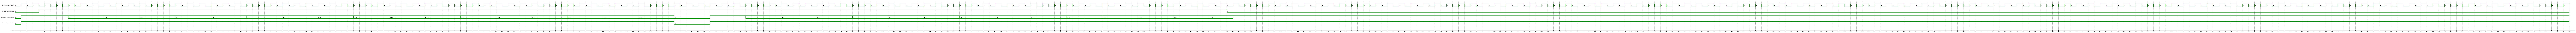

In [49]:
%%waveform tb_decade_counter.vcd
sign_list = ['tb_decade_counter.clk', 'tb_decade_counter.rst', 'tb_decade_counter.count', 'tb_decade_counter.ten']
time_begin = 0
time_end = 430
base = 'dec'